In [2]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
boston_dataset = load_boston()

c:\Users\zxcsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [4]:
x = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names) # 데이터
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV']) # 해답

train_test_split를 활용하여 dataset을 분리해보세요.

In [5]:
train_test_split(x,y)

[         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
 324   0.34109   0.0   7.38   0.0  0.493  6.415  40.1  4.7211   5.0  287.0   
 475   6.39312   0.0  18.10   0.0  0.584  6.162  97.4  2.2060  24.0  666.0   
 434  13.91340   0.0  18.10   0.0  0.713  6.208  95.0  2.2222  24.0  666.0   
 419  11.81230   0.0  18.10   0.0  0.718  6.824  76.5  1.7940  24.0  666.0   
 345   0.03113   0.0   4.39   0.0  0.442  6.014  48.5  8.0136   3.0  352.0   
 ..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
 213   0.14052   0.0  10.59   0.0  0.489  6.375  32.3  3.9454   4.0  277.0   
 225   0.52693   0.0   6.20   0.0  0.504  8.725  83.0  2.8944   8.0  307.0   
 275   0.09604  40.0   6.41   0.0  0.447  6.854  42.8  4.2673   4.0  254.0   
 170   1.20742   0.0  19.58   0.0  0.605  5.875  94.6  2.4259   5.0  403.0   
 101   0.11432   0.0   8.56   0.0  0.520  6.781  71.3  2.8561   5.0  384.0   
 
      PTRATIO       B  LSTAT  
 324     19.6  396.90   6.12  


모델을 선언하고 데이터를 피팅해보세요.


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

test data를 활용하여 모델이 제대로 학습 됐는지 확인해보세요.

In [12]:
y_test_prediction = model.predict(x_test)
mean_squared_error(y_test, y_test_prediction)

20.86929218377044

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()

X = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)
Y = pd.DataFrame(iris_data.target,columns=['class'])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

model.predict(x_test)

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [22]:
model.score(x_test,y_test)

0.9333333333333333

In [25]:
y_test['y_predict'] = model.predict(x_test)

In [33]:
y_test['y_predict'] = model.predict(x_test)
print('전체 개수 : ',len(y_test))
print('정답 개수 : ',len(y_test[y_test['class']==y_test['y_predict']]))
print('오답 개수 : ',len(y_test[y_test['class']!=y_test['y_predict']]))

전체 개수 :  30
정답 개수 :  28
오답 개수 :  2


In [35]:
model.score(x_test, y_test['class'])

0.9333333333333333

In [38]:
import matplotlib.pyplot as plt
import numpy as np

importance = model.feature_importances_
importance

array([0.02320048, 0.        , 0.02980885, 0.94699068])

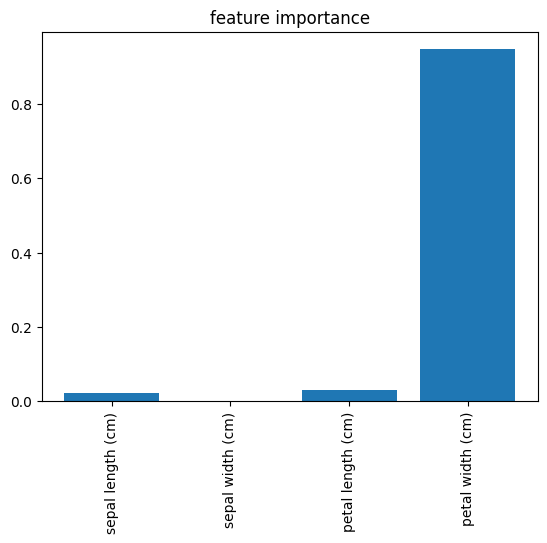

In [37]:
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)),importance)
plt.xticks(range(len(importance)),X.columns,rotation = 90)
plt.show()